In [1]:
from cryptodata import *

In [2]:
name = 'binance_btc_30m'
#df = get_market(exchange='binance',market='btc',start_date='1 year ago',interval='30m')
#to_pickle(df,name)

In [75]:
df = read_pickle(name)
dfc = get_closes(df).pct_change().dropna()

In [87]:
for hour in range(1,16):
    df = read_pickle(name)
    dfc = get_closes(df).pct_change().dropna()
    dfc = dfc.resample('{}h'.format(hour)).sum()
    for window in range(1,11):
        tmp = dfc.rolling(window).sum().idxmax(axis=1).shift(1).dropna()
        final = pd.Series(dfc.lookup(tmp.index,tmp.values)).cumsum().tail(1)
        print 'hours={} window={}, final={}'.format(hour,window,final.values[0])

hours=1 window=1, final=-55.7459668152
hours=1 window=2, final=-52.892279179
hours=1 window=3, final=-48.5959996802
hours=1 window=4, final=-44.7524234213
hours=1 window=5, final=-47.2517143291
hours=1 window=6, final=-37.8429455951
hours=1 window=7, final=-35.8057083521
hours=1 window=8, final=-35.2536372883
hours=1 window=9, final=-30.4858427906
hours=1 window=10, final=-31.9165277956
hours=2 window=1, final=-33.4121534782
hours=2 window=2, final=-30.4272808854
hours=2 window=3, final=-26.0012089467
hours=2 window=4, final=-23.483776664
hours=2 window=5, final=-20.668729815
hours=2 window=6, final=-13.2749379001
hours=2 window=7, final=-7.42379871286
hours=2 window=8, final=-2.03516326467
hours=2 window=9, final=-0.790421855614
hours=2 window=10, final=2.94141373145
hours=3 window=1, final=-18.970097712
hours=3 window=2, final=-15.7328984272
hours=3 window=3, final=-9.55464651376
hours=3 window=4, final=-4.85245187439
hours=3 window=5, final=5.943989137
hours=3 window=6, final=8.5046

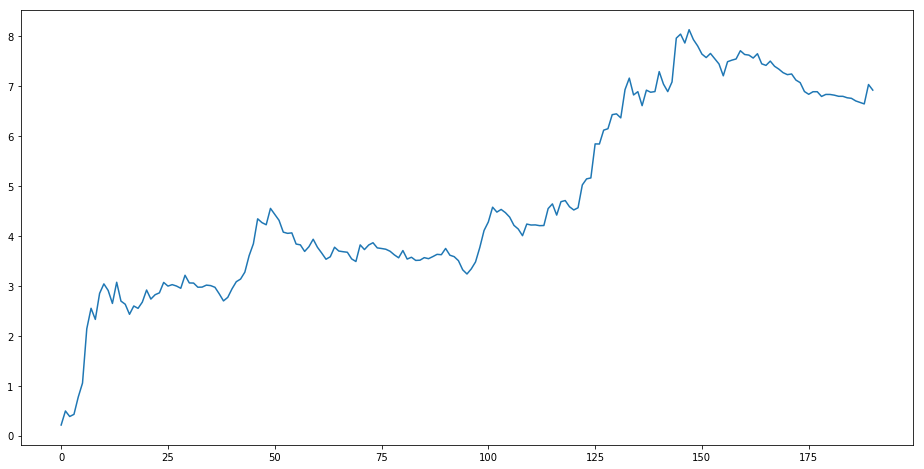

In [100]:
hour = 24
window = 30
df = read_pickle(name)
dfc = get_closes(df).pct_change().dropna()
dfc = dfc.resample('{}h'.format(hour)).sum()
tmp = dfc.rolling(window).sum().idxmax(axis=1).shift(1).dropna()
final = pd.Series(dfc.lookup(tmp.index,tmp.values)).cumsum().plot()

In [74]:
(700*8)/24

233